## 1 step forward and backward pass of a modern/modified(?) LeNet

In [1]:
from datasets import load_dataset
mnist = load_dataset("mnist")
mnist

/Users/josebenitez/Documents/repositories/others/lenet-python/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 60000
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 10000
    })
})

In [2]:
# see one example
mnist["train"][0]["image"]

In [3]:
print(f"Label: {mnist['train'][0]['label']}")
print(f"Size: {mnist['train'][0]['image'].size}")


Label: 5
Size: (28, 28)


In [4]:
import numpy as np
example_np = np.array(mnist['train'][0]['image'])

In [5]:
# Convolutions - Kernels and biases init
kernel_conv1 = np.random.randn(6, 5, 5) * 0.1
bias_conv1 = np.zeros(6)
kernel_conv2 = np.random.randn(16, 5, 5, 6) * 0.1
bias_conv2 = np.zeros(16) 

(24, 24, 6)
(12, 12, 6)


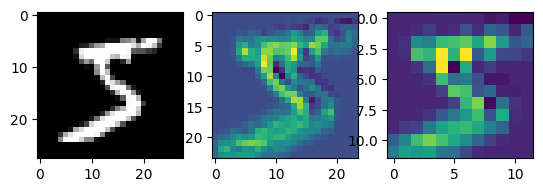

In [ ]:
import matplotlib.pyplot as plt
# Let's make a convolution of the image with the kernel 
# Bloque 1 C1 - DIM 24x24x6 - First conv layer
conv1 = np.zeros((24, 24, 6))
for k in range(6):
    for i in range(24):
        for j in range(24):
            conv1[i, j, k] = np.sum(example_np[i:i+5, j:j+5] * kernel_conv1[k])

print(conv1.shape)

# reduce dimension of the image using pooling
pool1 = np.zeros((12, 12, 6))
for k in range(6):
    for i in range(12):
        for j in range(12):
            block = conv1[i*2:i*2+2, j*2:j*2+2, k]
            pool1[i, j, k] = np.mean(block)

print(pool1.shape)

ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(example_np, cmap='gray')
ax2.imshow(conv1[:, :, 0]) 
ax3.imshow(pool1[:, :, 0])
plt.show()


In [13]:
# bloque 2 - conv2 y pool2
# ya que pool1 tiene 6 canales de entrada, tenemos que crear el kernel de conv2 con 5 canales de salida
kernel_conv2 = np.random.randn(16, 5, 5, 6) * 0.1
conv2 = np.zeros((8, 8, 16))
for k in range(16):
    for i in range(8):
        for j in range(8):
            conv2[i, j, k] = np.sum(pool1[i:i+5, j:j+5, :] * kernel_conv2[k])

print(conv2.shape)

Pool2 = np.zeros((4, 4, 16))
for k in range(16):
    for i in range(4):
        for j in range(4):
            Pool2[i, j, k] = np.mean(conv2[i*2:i*2+2, j*2:j*2+2, k])

print(Pool2.shape)

# flatten the results 4x4
flatten = Pool2.flatten()
print(flatten.shape)




(8, 8, 16)
(4, 4, 16)
(256,)


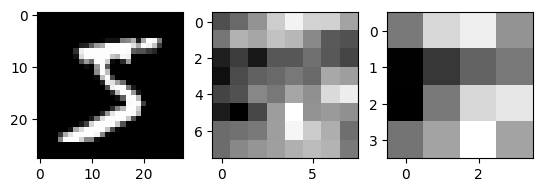

In [14]:
# let's visualize the results
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(example_np, cmap='gray')
ax2.imshow(conv2[:, :, 0], cmap='gray')
ax3.imshow(Pool2[:, :, 0], cmap='gray')

plt.show()

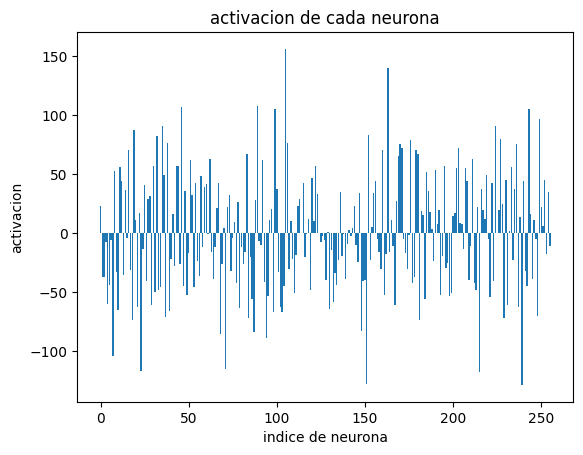

flatten [  22.63465034  -36.87241109  -37.59521566   -7.35057277  -60.39669269
  -43.68359481   -6.18285112 -104.20783063   52.88113562  -33.00123206
  -65.21633105   56.45902147   44.05046797  -35.46278165   36.53474257
   -3.85417761   70.22326824  -31.44915032  -73.98989759   87.663135
   11.14725158  -62.90955639   17.00537335 -116.66097737  -13.88564143
   40.57423201  -41.03151733   28.58639473   31.46276131  -60.5960808
   56.9638403   -49.90794261   82.74610869  -48.2722889   -45.59797036
   91.15510665   49.46811571  -71.26751526   76.35215472  -66.39546487
  -22.05584891   16.30586719  -27.5316514    56.88834542   56.51320861
  -26.28017295  106.82928936  -45.00293639   35.43866734  -52.23454471
  -16.63974266   61.72120317   32.22732963  -45.69927568   42.28987886
  -23.39683699  -36.15594018   48.28705878  -11.74748679   39.30819427
   41.57374624   -0.77241911   62.51553725  -16.26461666  -38.97630737
  -11.97108453   21.50937769   42.53285861  -85.72325689  -26.13350862
 

In [15]:
plt.bar(range(len(flatten)), flatten)
plt.xlabel("indice de neurona")
plt.ylabel("activacion")
plt.title("activacion de cada neurona")
plt.show()


print('flatten', flatten)

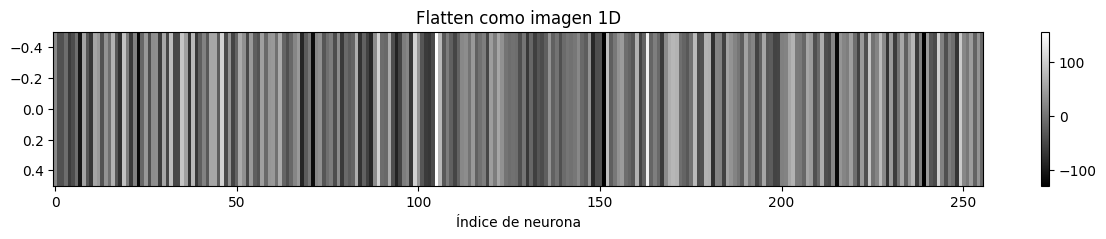

In [16]:
# ver como se ve el flatten como imagen 1D
plt.figure(figsize=(15, 2))
plt.imshow(flatten.reshape(1, -1), cmap='gray', aspect='auto')
plt.xlabel('Índice de neurona')
plt.title('Flatten como imagen 1D')
plt.colorbar()
plt.show()

In [17]:
# ahora trabajemos en la FC (fully connected)
# FC1 256 to 120 neurons
# FC2 120 to 84 neurons
# FC3 84 to 10 neurons (10 classes) (UNA POR CADA DIGITO)

# cada capaz hace:
# output layer output =  weights @ input + bias
# funcion de activación: ReLu, tanh, sigmoid, softmax, etc
# output = activation(output)

#     256 → 120 → 84 → 10                
def ReLu(x):
    return np.maximum(0, x)

def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))


weights_fc1 = np.random.randn(120, 256) * 0.1
weights_fc2 = np.random.randn(84, 120) * 0.1
weights_fc3 = np.random.randn(10, 84) * 0.1

bias_fc1 = np.random.randn(120) * 0.1
bias_fc2 = np.random.randn(84) * 0.1
bias_fc3 = np.random.randn(10) * 0.1

# FC1 # aplicar la función de activación ReLu para capas intermedias - a diferencia de tanh(que utiliza lenet original)
output_fc1 = weights_fc1 @ flatten + bias_fc1
output_fc1 = ReLu(output_fc1)
# FC2 
output_fc2 = weights_fc2 @ output_fc1 + bias_fc2
output_fc2 = ReLu(output_fc2)
# FC3
output_fc3 = weights_fc3 @ output_fc2 + bias_fc3
y_pred = softmax(output_fc3)

loss = -np.log(y_pred[5])
print('loss', loss)
print('prediccion', np.argmax(y_pred))
label = mnist['train'][0]['label']
print('correct label', label)


loss 75.34815572287651
prediccion 6
correct label 5


In [18]:
### backpropagation step
# gradient of the loss with respect to the output
# FC3: Sotfwmax + cross-entropy loss


dz3 = y_pred.copy()
dz3[label] -= 1 # para que el gradiente apunte hacia el valor correcto

dWeights_fc3 = np.outer(dz3, output_fc2)
dBiases_fc3 = dz3
dOutput_fc2 = weights_fc3.T @ dz3

# FC2: ReLu
dz2 = dOutput_fc2 * (output_fc2 > 0)
dWeights_fc2 = np.outer(dz2, output_fc1)
dBiases_fc2 = dz2
dOutput_fc1 = weights_fc2.T @ dz2

# FC1: ReLu
dz1 = dOutput_fc1 * (output_fc1 > 0)
dWeights_fc1 = np.outer(dz1, flatten)
dBiases_fc1 = dz1
dFlatten = weights_fc1.T @ dz1


In [19]:

# backprop for the conv layers
# Paso 1: Reshape flatten → pool2
# backwards step
dpool2 = dFlatten.reshape(4, 4, 16)

# Paso 2: Backprop a través de Pool2
dconv2 = np.zeros_like(conv2)
for k in range(16):
    for i in range(4):
        for j in range(4):
                # El gradiente se distribuye uniformemente
                # en la región 2x2 que se promedió
                dconv2[i*2:i*2+2, j*2:j*2+2, k] += dpool2[i, j, k] / 4
                # Dividir entre 4 porque average pooling toma promedio de 4 valores
            
# Paso 3: Backprop a través de Conv2

dweights_conv2 = np.zeros_like(kernel_conv2)  # (16,5,5,6)
dbias_conv2 = np.zeros_like(bias_conv2)        # (16,)
dpool1 = np.zeros_like(pool1)                  # (12,12,6)

for k in range(16):  # Para cada filtro
    for i in range(8):
        for j in range(8):
            # Región del input que se usó en forward
            input_patch = pool1[i:i+5, j:j+5, :]  # (5,5,6)
            
            # Gradiente del kernel: acumular sobre todas las posiciones
            dweights_conv2[k] += input_patch * dconv2[i, j, k]
            
            # Gradiente del bias: simplemente sumar
            dbias_conv2[k] += dconv2[i, j, k]
            
            # Gradiente hacia atrás (a pool1)
            dpool1[i:i+5, j:j+5, :] += kernel_conv2[k] * dconv2[i, j, k]
# normalizar por numero de posiciones
dweights_conv2 /= (8 * 8)
dbias_conv2 /= (8 * 8)
# Paso 4: Backprop a través de Pool1

# ═══════════════════════════════════════════════════
# POOL1: Average Pooling 2x2
# Input: conv1 (24x24x6), Output: pool1 (12x12x6)
# ═══════════════════════════════════════════════════
dconv1 = np.zeros_like(conv1)  # (24,24,6)

for k in range(6):
    for i in range(12):
        for j in range(12):
            dconv1[i*2:i*2+2, j*2:j*2+2, k] += dpool1[i, j, k] / 4

# Paso 5: Backprop a través de Conv1

# ═══════════════════════════════════════════════════
# CONV1: 28x28 → 24x24x6 (kernel 5x5, 6 filtros)
# ═══════════════════════════════════════════════════
dweights_conv1 = np.zeros_like(kernel_conv1)  # (6,5,5)
dbias_conv1 = np.zeros_like(bias_conv1)        # (6,)
# d_input no lo necesitamos (no hay capas antes)

for k in range(6):  # Para cada filtro
    for i in range(24):
        for j in range(24):
            # Región del input que se usó
            input_patch = example_np[i:i+5, j:j+5]  # (5,5)
            
            # Gradiente del kernel
            dweights_conv1[k] += input_patch * dconv1[i, j, k]
            
            # Gradiente del bias
            dbias_conv1[k] += dconv1[i, j, k]
# normalizar por numero de posiciones
dweights_conv1 /= (24 * 24)
dbias_conv1 /= (24 * 24)





In [20]:
learning_rate = 0.001
# update weights and biases

# Actualizar pesos y sesgos de las capas FC
weights_fc1 -= learning_rate * dWeights_fc1
bias_fc1 -= learning_rate * dBiases_fc1
weights_fc2 -= learning_rate * dWeights_fc2
bias_fc2 -= learning_rate * dBiases_fc2
weights_fc3 -= learning_rate * dWeights_fc3
bias_fc3 -= learning_rate * dBiases_fc3

# Actualizar pesos y sesgos de las capas convolucionales
kernel_conv2 -= learning_rate * dweights_conv2
bias_conv2 -= learning_rate * dbias_conv2
kernel_conv1 -= learning_rate * dweights_conv1
bias_conv1 -= learning_rate * dbias_conv1